<a href="https://colab.research.google.com/github/WilliamShengYangHuang/AALU_Coding/blob/main/Mapping_with_GeoPandas_and_Bokeh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Install Necessary Libraries**

In [ ]:
!pip install geopandas # use pip (a Python-based package-management system) to install GeoPandas library which is not built-in in Colab

     |████████████████████████████████| 1.0 MB 7.9 MB/s 
     |████████████████████████████████| 15.4 MB 26.3 MB/s 
     |████████████████████████████████| 6.3 MB 25.3 MB/s 


### **Import Libraries**

In [ ]:
# Data processing
import geopandas as gpd # GeoPandas is an open source library providing simplistic working interface to work with geospatial data in Python

# Visualisation
import matplotlib.pyplot as plt # Matplotlib is an open source plotting library for Python
% matplotlib inline
from bokeh.io import output_file, output_notebook, show # Bokeh is an open source library for interactive data visualisation
from bokeh.plotting import figure # We need the bokeh.plotting.figure function to draw interactive maps
output_notebook() # function that renders the figure in a notebook; necessary for Bokeh rendering in Colab
from bokeh.models import ColumnDataSource, MultiPolygons, LogColorMapper
from bokeh.palettes import Viridis6 as palette # import colour scale Viridis6 for plotting (reference: http://repec.sowi.unibe.ch/stata/palettes/colors.html)

# I/O
import io # A module to do with input/output
from google.colab import files # We want to use the file.upload() fuction to upload data in a GUI

# Math
import numpy as np

### **Upload data**

In [ ]:
uploaded = files.upload()

Saving london_parks.geojson to london_parks.geojson


### **Read data**

In [ ]:
london_parks = gpd.read_file('london_parks.geojson')

### **Plot data** (Non-interaction)

Text(20.82413967293661, 0.5, 'Latitude')

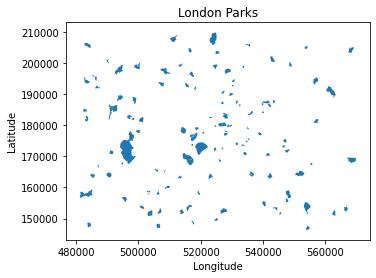

In [ ]:
london_parks.plot()
plt.title('London Parks')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

### **Check Data Frame** 

In [ ]:
london_parks.head(3)
#gpd.GeoDataFrame(london_parks)

,ListEntry,Name,Grade,RegDate,AmendDate,LegacyUID,NGR,CaptureSca,Easting,Northing,AREA_HA,geometry
0,1000108,HAMPTON COURT,I,1987-10-01,None,1001,TQ 16570 68051,1:10000,516729.485695,168277.508178,289.456366,"MULTIPOLYGON (((517673.400 168880.850, 517673...."
1,1000607,TAPLOW COURT,II,1987-08-30,None,1597,SU9061082553,1:10000,490628.178758,182458.046408,29.686244,"MULTIPOLYGON (((490875.175 182964.466, 490866...."
2,1001672,NONSUCH PARK,II,1995-07-19,None,5208,TQ 23091 63767,1:10000,523106.115946,163586.827552,123.216019,"MULTIPOLYGON (((523830.162 163508.856, 523832...."


### **GeoPandas-Bokeh Conversion**

In [ ]:
def convert_GeoPandas_to_Bokeh_format(gdf):
    """
    Function to convert a GeoPandas GeoDataFrame to a Bokeh
    ColumnDataSource object.
    
    :param: (GeoDataFrame) gdf: GeoPandas GeoDataFrame with polygon(s) under
                                the column name 'geometry.'
                                
    :return: ColumnDataSource for Bokeh.
    """
    gdf_new = gdf.drop('geometry', axis=1).copy()
    gdf_new['x'] = gdf.apply(getGeometryCoords, 
                             geom='geometry', 
                             coord_type='x', 
                             shape_type='polygon', 
                             axis=1)
    
    gdf_new['y'] = gdf.apply(getGeometryCoords, 
                             geom='geometry', 
                             coord_type='y', 
                             shape_type='polygon', 
                             axis=1)
    
    return ColumnDataSource(gdf_new)


def getGeometryCoords(row, geom, coord_type, shape_type):
    """
    Returns the coordinates ('x' or 'y') of edges of a Polygon exterior.
    
    :param: (GeoPandas Series) row : The row of each of the GeoPandas DataFrame.
    :param: (str) geom : The column name.
    :param: (str) coord_type : Whether it's 'x' or 'y' coordinate.
    :param: (str) shape_type
    """
    
    # Parse the exterior of the coordinate
    if shape_type == 'polygon':
        exterior = row[geom].geoms[0].exterior
        if coord_type == 'x':
            # Get the x coordinates of the exterior
            return list( exterior.coords.xy[0] )    
        
        elif coord_type == 'y':
            # Get the y coordinates of the exterior
            return list( exterior.coords.xy[1] )

    elif shape_type == 'point':
        exterior = row[geom]
    
        if coord_type == 'x':
            # Get the x coordinates of the exterior
            return  exterior.coords.xy[0][0] 

        elif coord_type == 'y':
            # Get the y coordinates of the exterior
            return  exterior.coords.xy[1][0]

In [ ]:
ldn_pks_Source = convert_GeoPandas_to_Bokeh_format(london_parks)

### **Interactive plotting**

In [ ]:
# Configuring plot tools
TOOLS="hover,crosshair,pan,wheel_zoom,undo,redo,reset,tap,save,box_select,lasso_select"
fig = figure(title="London Parks", tools=TOOLS, toolbar_location="right")

In [ ]:
# fig.multi_line('x', 'y', source=ldn_pks_Source, color="black", line_width=2)

N = 4000
X = np.random.random(size=N) * 100
Y = np.random.random(size=N) * 100
colours = np.array([ [r, g, 150] for r, g in zip(50 + 2*X, 30 + 2*Y) ], dtype="uint8")

fig.patches('x', 'y', source=ldn_pks_Source,
          fill_color="red", fill_alpha=0.7, 
          line_color="black", line_width=0.1)

"""
palette = tuple(reversed(palette))
color_mapper = LogColorMapper(palette=palette)

fig.patches('x', 'y', source=ldn_pks_Source,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="black", line_width=0.0)
"""          
show(fig)